In [1]:
pip install tfds-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 45.7 MB/s eta 0:00:00


# New Section

In [2]:
import tensorflow as tf
import tensorflow_datasets as data
import tensorflow_hub as hub



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df,info=data.load(name='beans',with_info=True,as_supervised=True,split=['train','validation'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCQIFHV/beans-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCQIFHV/beans-validation.tfrecord*...:   0%|         …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/0.1.0.incompleteCQIFHV/beans-test.tfrecord*...:   0%|          | 0/1…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [5]:
def scale(image,label):
  image= tf.cast(image,tf.float32)
  image/=255.0
  return tf.image.resize(image,[224,224]),tf.one_hot(label,3)

In [6]:
traindata=df[0].map(scale).batch(25)
validation=df[1].map(scale).batch(25)
traindata.cache()
validation.cache()

<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [7]:
feature_extractor_model1 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"


In [8]:
feature_extractor_layer = hub.KerasLayer(
      feature_extractor_model1, input_shape=(224, 224, 3), trainable=False)

In [9]:
num_classes = 3

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes,activation='softmax')
    ])


In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
      loss='categorical_crossentropy',
        metrics=['accuracy'])



In [11]:
history = model.fit(traindata,epochs=10,validation_data=validation)


Epoch 1/10
42/42 [==============================] - 18s 132ms/step - loss: 0.9746 - accuracy: 0.5609 - val_loss: 0.5143 - val_accuracy: 0.8120
Epoch 2/10
42/42 [==============================] - 2s 42ms/step - loss: 0.5664 - accuracy: 0.7611 - val_loss: 0.4135 - val_accuracy: 0.8496
Epoch 3/10
42/42 [==============================] - 3s 74ms/step - loss: 0.4573 - accuracy: 0.8211 - val_loss: 0.3427 - val_accuracy: 0.8722
Epoch 4/10
42/42 [==============================] - 2s 45ms/step - loss: 0.3670 - accuracy: 0.8501 - val_loss: 0.3020 - val_accuracy: 0.9098
Epoch 5/10
42/42 [==============================] - 2s 41ms/step - loss: 0.3318 - accuracy: 0.8675 - val_loss: 0.2883 - val_accuracy: 0.8947
Epoch 6/10
42/42 [==============================] - 2s 40ms/step - loss: 0.3034 - accuracy: 0.8801 - val_loss: 0.2759 - val_accuracy: 0.9023
Epoch 7/10
42/42 [==============================] - 2s 41ms/step - loss: 0.2938 - accuracy: 0.8907 - val_loss: 0.2604 - val_accuracy: 0.9248
Epoch 8/10


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [13]:
from keras.models import load_model
model.save("bean.h5")

In [14]:
#from keras.preprocessing import image
import keras.utils as image
import matplotlib.image as img

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

In [29]:
lst=['bean rust','angular spot','healthy']

1/1 [==============================] - 0s 23ms/step
Model Prediction=> angular spot


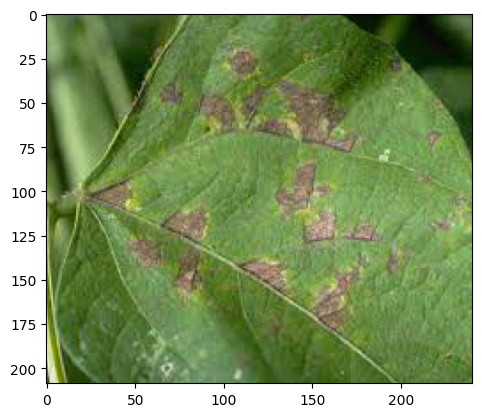

In [31]:
img_path='/content/sample_data/download (1).jfif'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


result=model.predict(x)
res=lst[np.argmax(result)]

print("Model Prediction=>",res)
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)